# COURSERA CAPSTONE FINAL PROJECT - THE BATLLE OF MADRID NEIGHBORHOODS

### INTRODUCTION

This project is a guide for any investor who wants to open a food venue in Madrid and needs to do a business plan to decide, in the first place, which kind of food venue should open, and in the second place, which would be the best borough/neighborhood to open it.

Through this project we will remark some important factors that the investors should keep in mind. It´ll be done by exploring the different boroughs in Madrid, with some important and general characteristics as the population or the average income per borough, and some specific characteristics as the most common food venues in each borough.

This project doesn´t pretend to develop a magic algorithm with which the investor knows what place he should open and where, because the are many other variables that should be analyze to make this decision.

This project gives a general overview of the socialeconomic situation of the boroughs in Madrid, and the distribution of the categories of food venues  in each borough.  This will be the first step and  the base to develop a stronger business plan. 

### GETTING AND VISUALIZING THE MAIN DATA

- Libraries that are going to be used in the project

In [1]:
import pandas as pd # Library for Data Analysis 
import numpy as np #Library to handle data in a vectorized manner 
import matplotlib.pyplot as plt
import seaborn as sns 

from geopy.geocoders import Nominatim
import geocoder # To retrieve Location Data
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import folium # map rendering library

from sklearn.cluster import KMeans # Python machine learning Library. Unsupervised model
from sklearn.preprocessing import MinMaxScaler # Data standarization




- Population distribution in Madrid dataset (Poblacion_barrios_madrid.csv): It´ll give us the total population of each borough, and the distribution by age. It was downloaded from the the official website of the Madrid town hall

In [2]:
madrid=pd.read_csv('Poblacion_barrios_madrid.csv',decimal=',')
madrid.columns=['Borough','Population','0-15 years','16-64 years','More than 65 years','More than 80 years',
                'Youth Ratio','Replacement Ratio'] # Rename de columns
madrid

,Borough,Population,0-15 years,16-64 years,More than 65 years,More than 80 years,Youth Ratio,Replacement Ratio
0,Ciudad de Madrid,3266126,14.22,65.53,20.26,7.29,70.18,62.19
1,01. Centro Madrid,134881,8.28,75.67,16.05,5.52,51.61,35.99
2,02. Arganzuela,153830,12.61,68.12,19.27,6.48,65.44,47.25
3,03. Retiro,119379,12.55,61.70,25.76,8.73,48.72,43.89
4,04. Barrio Salamanca,146148,11.35,64.76,23.89,8.91,47.51,46.58
5,05. Chamartín,145865,13.82,62.91,23.28,8.32,59.35,50.48
6,06. Tetuán,157937,11.72,68.95,19.33,7.42,60.64,54.23
7,07. Chamberí,139448,10.87,64.95,24.18,8.86,44.95,45.85
8,08. Fuencarral-El Pardo,246021,17.97,61.23,20.80,6.22,86.38,61.56
9,09. Moncloa-Aravaca,119423,14.52,63.58,21.90,7.64,66.28,66.92


In [3]:
madrid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Borough             22 non-null     object 
 1   Population          22 non-null     int64  
 2   0-15 years          22 non-null     float64
 3   16-64 years         22 non-null     float64
 4   More than 65 years  22 non-null     float64
 5   More than 80 years  22 non-null     float64
 6   Youth Ratio         22 non-null     float64
 7   Replacement Ratio   22 non-null     float64
dtypes: float64(6), int64(1), object(1)
memory usage: 1.5+ KB


- We drop the first row that represents the total

In [4]:
madrid.drop(0,axis=0,inplace=True)
madrid=madrid.reset_index().drop('index',1)

In [5]:
madrid.describe()

,Population,0-15 years,16-64 years,More than 65 years,More than 80 years,Youth Ratio,Replacement Ratio
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,155529.809524,14.348095,65.624286,20.028095,7.136190,75.960000,64.516667
std,56308.549307,2.967089,3.274884,3.778360,1.693941,29.031495,16.871100
min,48972.000000,8.280000,61.230000,12.480000,3.670000,44.950000,35.990000
25%,119423.000000,12.440000,63.580000,17.570000,6.220000,51.610000,50.480000
50%,146148.000000,13.940000,64.950000,19.270000,7.080000,66.280000,62.010000
75%,188267.000000,16.590000,67.290000,23.280000,8.730000,91.500000,77.320000
max,253040.000000,19.300000,75.670000,26.050000,10.290000,154.650000,104.040000


- Split the numbers from the borough in order to only keep the borough

In [6]:
madrid.Borough=madrid.Borough.str.split('.').str.get(1)

<function matplotlib.pyplot.show(*args, **kw)>

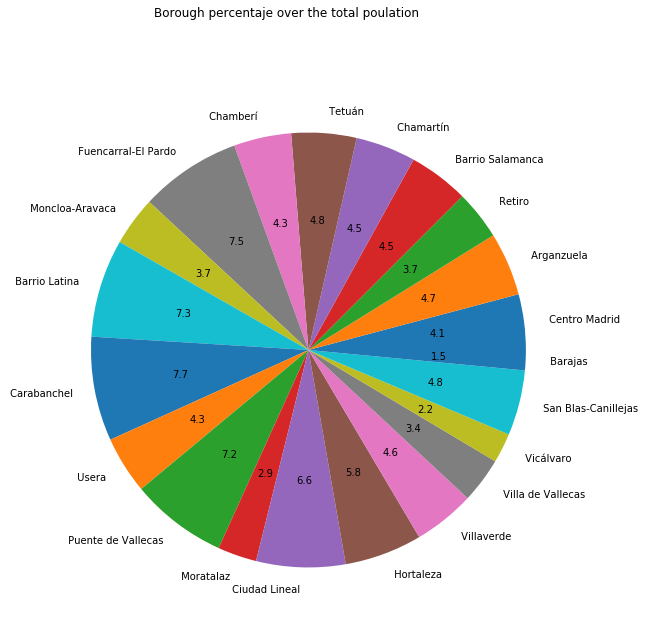

In [7]:
plt.rcParams['figure.figsize']=24,10
plt.pie(madrid.Population,labels=madrid.Borough,autopct='%.1f',)
plt.suptitle('Borough percentaje over the total poulation')
plt.show

If our investor doesn´t like the risk, he maybe should consider this graph to avoid boroughs as Moratalaz,Barajas or Vicálvaro, which have a very low percentage of the total population

- House pricing dataset (precio_vivienda.csv): It was obtained from the national statistic institute in Spain (INE). I´ll only use the column “Renta_INE”, which gives the average income for each borough.

In [8]:
renta_ine=pd.read_csv('precio_vivienda.csv',usecols=['Distrito','Renta_INE'])
renta_ine.head()

,Distrito,Renta_INE
0,Centro,16147
1,Arganzuela,17306
2,Retiro,21504
3,Salamanca,24433
4,Chamartín,25969


Adding the average income column to the main dataframe

In [9]:
madrid['Renta_INE']=renta_ine['Renta_INE']

In [10]:
madrid.head(1)

,Borough,Population,0-15 years,16-64 years,More than 65 years,More than 80 years,Youth Ratio,Replacement Ratio,Renta_INE
0,Centro Madrid,134881,8.28,75.67,16.05,5.52,51.61,35.99,16147


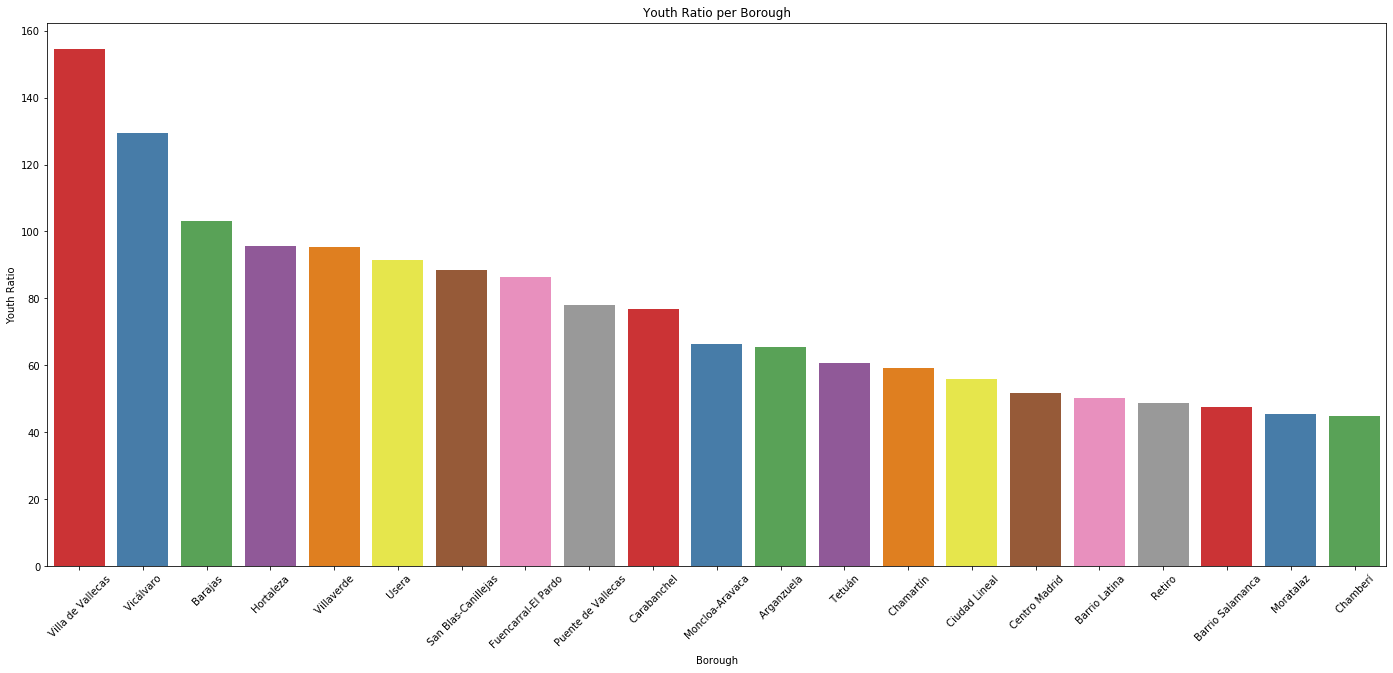

In [18]:
youth_ratio=madrid.sort_values(by='Youth Ratio',ascending=False)
chart=sns.barplot(youth_ratio.Borough,youth_ratio['Youth Ratio'],palette='Set1')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
chart.set_title('Youth Ratio per Borough')
plt.show()

Youth Ratio is calculated as (0-15 years population / More than 65 years population * 100). 

This graph shows us that except for some exceptions, the boroughs with a higher Youth Ratio are those that are in the outskirts of the city

This might be a factor that the investor should keep in mind, depending on the kind of food venue he chooses. If he pretend to open a fast food venue, Youth Ratio can be an important point of decision, but of course not the only one.

Text(0.5, 1.0, 'Average Income per Borough')

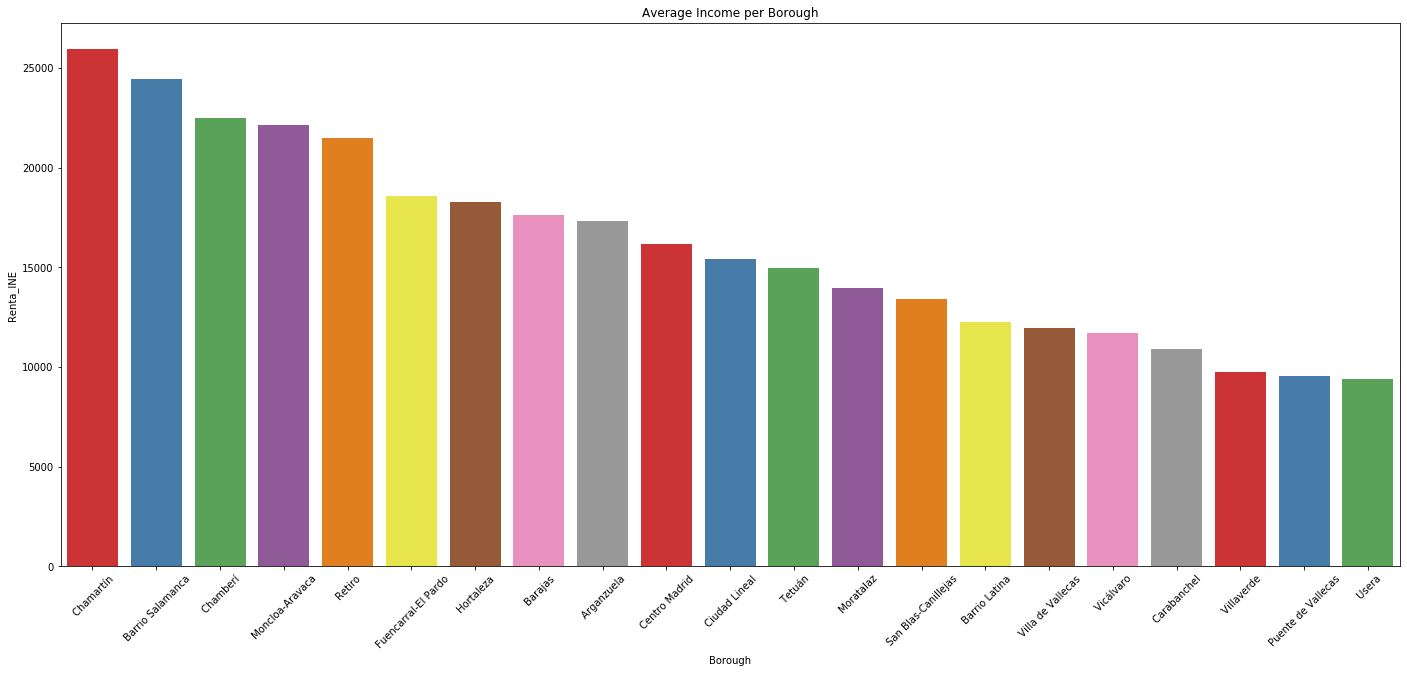

In [21]:
renta_ordered=madrid.sort_values(by='Renta_INE',ascending=False)
chart2=sns.barplot(renta_ordered.Borough,renta_ordered['Renta_INE'],palette='Set1')
chart2.set_xticklabels(chart2.get_xticklabels(), rotation=45)
chart2.set_title('Average Income per Borough')

Finally, the average income per borough can be another important factor of decision, with the help of the population ratio and the Youth ratio. We can see that the  five boroughs with more income are also part of the boroughs with a lower Youth Ratio

### GETTING COORDINATES OF EACH BOROUGH 

In [22]:
# define the dataframe columns
column_names = ['Latitude', 'Longitude'] 

# instantiate the dataframe
coordinates = pd.DataFrame(columns=column_names)
coordinates

,Latitude,Longitude


In [23]:
# Loop using geocoder library
boroughs=madrid.Borough.to_list()
for borough in boroughs:
    g = geocoder.arcgis('{}, Madrid, SPAIN'.format(borough))
    lat_lng_coords = g.latlng
    coordinates = coordinates.append({'Latitude': lat_lng_coords[0],
                               'Longitude': lat_lng_coords[1]}, ignore_index=True)
    
coordinates
    

,Latitude,Longitude
0,40.184950,-3.679100
1,40.400210,-3.696180
2,40.413170,-3.683070
3,40.436300,-3.685600
4,40.450000,-3.700000
5,40.466670,-3.716670
6,40.434040,-3.703790
7,40.498400,-3.731400
8,40.435470,-3.731700
9,40.401064,-3.751336


***Correction: when I create the map, I see that Centro Borough is not correctly located, probably because it´s a common name, so let´s fix this and specify the address

In [24]:
g = geocoder.arcgis('Puerta del Sol, Madrid')
lat_lng_coords = g.latlng
coordinates.Latitude[0]=lat_lng_coords[0]
coordinates.Longitude[0]=lat_lng_coords[1]
coordinates.head(1)

,Latitude,Longitude
0,40.4167,-3.70356


#### Join the two DataFames and only keep the columns Borough, Population, Latitude, Longitude, Youth Ratio and Renta_INE

In [25]:
madrid.index = range(madrid.shape[0])
madrid_coordinates=pd.concat([madrid,coordinates],axis=1)
columns_to_drop=['0-15 years','16-64 years','More than 65 years','More than 80 years','Replacement Ratio']
madrid_coordinates.drop(columns_to_drop,axis=1,inplace=True)

In [26]:
madrid_coordinates.head(10)

,Borough,Population,Youth Ratio,Renta_INE,Latitude,Longitude
0,Centro Madrid,134881,51.61,16147,40.416700,-3.703560
1,Arganzuela,153830,65.44,17306,40.400210,-3.696180
2,Retiro,119379,48.72,21504,40.413170,-3.683070
3,Barrio Salamanca,146148,47.51,24433,40.436300,-3.685600
4,Chamartín,145865,59.35,25969,40.450000,-3.700000
5,Tetuán,157937,60.64,14970,40.466670,-3.716670
6,Chamberí,139448,44.95,22499,40.434040,-3.703790
7,Fuencarral-El Pardo,246021,86.38,18573,40.498400,-3.731400
8,Moncloa-Aravaca,119423,66.28,22152,40.435470,-3.731700
9,Barrio Latina,238154,50.19,12232,40.401064,-3.751336


#### Create a map of Madrid with the 21 boroughs located

In [28]:
#Using geolocator to obtain Madrid longitude and latitude
address = 'Madrid, España'
geolocator = Nominatim(user_agent="Madrid_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
# create map of Madrid using latitude and longitude values
map_madrid= folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough in zip(madrid_coordinates['Latitude'], madrid_coordinates['Longitude'],
                                           madrid_coordinates['Borough']):
    label = '{}'.format(borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_madrid)  
    
map_madrid

## GETTING THE FOOD VENUES FOR EACH BOROUGH

 #### Define Fourthsquare credentials

In [29]:
CLIENT_ID = 'ZCQ3RYENJGMFREJ1JEZJBICC1OHM41LXGPCIEBVSANGBQ5GT' 
CLIENT_SECRET = '02114VXQCT0NHAUKBHGTR2P30LAU32EMICVAAF1VZ2HNIWQ5'
VERSION = '20180605' 

print('My credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

My credentails:
CLIENT_ID: ZCQ3RYENJGMFREJ1JEZJBICC1OHM41LXGPCIEBVSANGBQ5GT
CLIENT_SECRET:02114VXQCT0NHAUKBHGTR2P30LAU32EMICVAAF1VZ2HNIWQ5


- Function to get the food venues through the Fourthsquare API

In [33]:
categoryID = '4d4b7105d754a06374d81259' ## Food ID (https://developer.foursquare.com/docs/build-with-foursquare/categories/)
radius = 3000
def getFoodVenuesMadrid(names, latitudes, longitudes, radius=radius,limit=300):

    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/search?categoryId={}&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            categoryID,    
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng,
            radius, 
            300)

        # make the GET request
        results = requests.get(url).json()["response"]['venues']
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['name'], 
            v['location']['lat'], 
            v['location']['lng'],  
            v['categories'][0]['name']) for v in results])

    food_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    food_venues.columns = ['Borough', 
                  'Borough Latitude', 
                  'Borough Longitude', 
                  'Food Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
        
    return(food_venues)

In [34]:
mad_foodvenues = pd.DataFrame()
radius=[1000,2000,3000]
#For loop for different radius
for i in radius:
    print("Starting loop for radius = ", i, "\n")
    food = getFoodVenuesMadrid(names=madrid_coordinates['Borough'],
                         latitudes=madrid_coordinates['Latitude'],
                         longitudes=madrid_coordinates['Longitude'],
                         radius=i,
                         )
    mad_foodvenues = mad_foodvenues.append(food)

print(' {} food venues located in 21 neighbors'.format(mad_foodvenues.shape[0]))

Starting loop for radius =  1000 

Starting loop for radius =  2000 

Starting loop for radius =  3000 

 3035 food venues located in 21 neighbors


In [48]:
#Reset the index
mad_foodvenues=mad_foodvenues.reset_index().drop('index',1)

#### NUMBER OF VENUES FOR EACH BOROUGH

We sort the Boroughs in alphabetical order in both DataFrames inr order to add the column Numer of Venues to madrid_coordinates

In [38]:
madrid_coordinates=madrid_coordinates.sort_values("Borough").reset_index().drop("index",axis=1)
food_venues_columns=mad_foodvenues.groupby('Borough')['Borough Latitude'].count().reset_index().drop("Borough",axis=1)
madrid_coordinates['Food Venues']=food_venues_columns
madrid_coordinates

,Borough,Population,Youth Ratio,Renta_INE,Latitude,Longitude,Food Venues
0,Arganzuela,153830,65.44,17306,40.400210,-3.696180,149
1,Barajas,48972,103.17,17641,40.491810,-3.569480,127
2,Barrio Latina,238154,50.19,12232,40.401064,-3.751336,147
3,Barrio Salamanca,146148,47.51,24433,40.436300,-3.685600,149
4,Carabanchel,253040,76.72,10872,40.390940,-3.724200,148
5,Centro Madrid,134881,51.61,16147,40.416700,-3.703560,150
6,Chamartín,145865,59.35,25969,40.450000,-3.700000,150
7,Chamberí,139448,44.95,22499,40.434040,-3.703790,150
8,Ciudad Lineal,216270,55.87,15408,40.453490,-3.654340,146
9,Fuencarral-El Pardo,246021,86.38,18573,40.498400,-3.731400,110


We got a maximum amount of 150 food venues for each borough, due to the settled limit, but it will be enough to have an idea about the kind of food venues in each borough

### Kinds of food venues in each borough

In [58]:
mad_foodvenues.head()

,Borough,Borough Latitude,Borough Longitude,Food Venue,Venue Latitude,Venue Longitude,Venue Category
0,Centro Madrid,40.4167,-3.70356,Rosi La Loca,40.415821,-3.702955,Tapas Restaurant
1,Centro Madrid,40.4167,-3.70356,La Mallorquina,40.416651,-3.704662,Pastry Shop
2,Centro Madrid,40.4167,-3.70356,Las Bravas,40.416134,-3.702072,Tapas Restaurant
3,Centro Madrid,40.4167,-3.70356,La Pulpería de Victoria,40.416506,-3.701709,Seafood Restaurant
4,Centro Madrid,40.4167,-3.70356,Starbucks,40.417195,-3.706119,Coffee Shop


- Top fifteen food venue categories in Madrid:

In [60]:
mad_foodvenues['Venue Category'].value_counts().head(15)

Spanish Restaurant      346
Bakery                  314
Restaurant              265
Coffee Shop             195
Café                    186
Tapas Restaurant        167
Pizza Place              88
Fast Food Restaurant     86
Diner                    77
Asian Restaurant         69
Snack Place              65
Burger Joint             62
Bar                      60
Italian Restaurant       56
Deli / Bodega            54
Name: Venue Category, dtype: int64

I´m going to join the Tapas Restaurant and Bar categories because both are pretty much the same, and also the categories coffee shop and café, wich are exactly the same

In [61]:
mad_foodvenues['Venue Category'] = mad_foodvenues["Venue Category"].replace(["Tapas Restaurant","Bar"], "Tapas Bar")
mad_foodvenues['Venue Category'] = mad_foodvenues["Venue Category"].replace(["Coffee Shop","Café","CasinoID"], "Coffee")
mad_foodvenues['Venue Category'].value_counts().head(15)


Coffee                  381
Spanish Restaurant      346
Bakery                  314
Restaurant              265
Tapas Bar               227
Pizza Place              88
Fast Food Restaurant     86
Diner                    77
Asian Restaurant         69
Snack Place              65
Burger Joint             62
Italian Restaurant       56
Deli / Bodega            54
Breakfast Spot           51
Ice Cream Shop           46
Name: Venue Category, dtype: int64

#### New dataframe with all the food venue categories in each borough, adding the columns Population, Youth Ratio and Renta_INEof our previous datafram

In [39]:
clasificated_venues=pd.crosstab(mad_foodvenues.Borough,mad_foodvenues['Venue Category']).reset_index()
clasificated_venues['Population']=madrid_coordinates['Population']
clasificated_venues['Youth Ratio']=madrid_coordinates['Youth Ratio']
clasificated_venues['Renta_INE']=madrid_coordinates['Renta_INE']
clasificated_venues

Venue Category,Borough,Airport Food Court,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bar,...,Tea Room,Thai Restaurant,Theme Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Wine Bar,Wings Joint,Population,Youth Ratio,Renta_INE
0,Arganzuela,0,0,0,5,4,0,0,18,3,...,0,0,0,0,3,0,0,153830,65.44,17306
1,Barajas,1,0,0,1,0,2,0,3,0,...,0,1,0,0,0,0,0,48972,103.17,17641
2,Barrio Latina,0,3,0,2,3,4,0,9,4,...,0,0,0,1,1,0,0,238154,50.19,12232
3,Barrio Salamanca,0,1,0,0,3,0,1,27,4,...,0,0,0,0,1,0,0,146148,47.51,24433
4,Carabanchel,0,2,1,3,2,3,0,6,3,...,0,0,0,0,1,1,0,253040,76.72,10872
5,Centro Madrid,0,0,0,0,5,0,0,25,4,...,0,0,0,0,3,1,0,134881,51.61,16147
6,Chamartín,0,3,0,0,3,0,0,23,4,...,0,0,0,0,0,0,0,145865,59.35,25969
7,Chamberí,0,0,0,0,5,2,0,24,4,...,0,0,0,0,1,0,0,139448,44.95,22499
8,Ciudad Lineal,0,2,0,1,4,0,0,15,4,...,0,0,0,0,0,0,0,216270,55.87,15408
9,Fuencarral-El Pardo,0,0,0,0,0,0,0,14,0,...,0,0,0,2,0,0,0,246021,86.38,18573


In [62]:
# one hot encoding
mad_foodvenues_encoded = pd.get_dummies(mad_foodvenues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
mad_foodvenues_encoded['Borough'] = mad_foodvenues['Borough'] 

# move neighborhood column to the first column
#fixed_columns = [scarborough_onehot.columns[-1]] + list(scarborough_onehot.columns[:-1])
#scarborough_onehot = scarborough_onehot[fixed_columns]

borough = mad_foodvenues_encoded['Borough']
mad_foodvenues_encoded.drop(labels=['Borough'], axis=1,inplace = True)
mad_foodvenues_encoded.insert(0, 'Borough', borough)

mad_foodvenues_encoded.head()

,Borough,Airport Food Court,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Beer Bar,...,Sushi Restaurant,Taco Place,Tapas Bar,Tea Room,Thai Restaurant,Theme Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Wine Bar,Wings Joint
0,Centro Madrid,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,Centro Madrid,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Centro Madrid,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,Centro Madrid,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Centro Madrid,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Group by Borough, and get the frequency of the occurrence of venue


In [63]:
mad_foodvenues_grouped=mad_foodvenues_encoded.groupby('Borough').mean().reset_index()
mad_foodvenues_grouped.head(5)

,Borough,Airport Food Court,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Beer Bar,...,Sushi Restaurant,Taco Place,Tapas Bar,Tea Room,Thai Restaurant,Theme Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Wine Bar,Wings Joint
0,Arganzuela,0.000000,0.000000,0.000000,0.033557,0.026846,0.000000,0.000000,0.120805,0.0,...,0.000000,0.0,0.100671,0.0,0.000000,0.0,0.000000,0.020134,0.000000,0.0
1,Barajas,0.007874,0.000000,0.000000,0.007874,0.000000,0.015748,0.000000,0.023622,0.0,...,0.007874,0.0,0.039370,0.0,0.007874,0.0,0.000000,0.000000,0.000000,0.0
2,Barrio Latina,0.000000,0.020408,0.000000,0.013605,0.020408,0.027211,0.000000,0.061224,0.0,...,0.013605,0.0,0.054422,0.0,0.000000,0.0,0.006803,0.006803,0.000000,0.0
3,Barrio Salamanca,0.000000,0.006711,0.000000,0.000000,0.020134,0.000000,0.006711,0.181208,0.0,...,0.013423,0.0,0.073826,0.0,0.000000,0.0,0.000000,0.006711,0.000000,0.0
4,Carabanchel,0.000000,0.013514,0.006757,0.020270,0.013514,0.020270,0.000000,0.040541,0.0,...,0.006757,0.0,0.060811,0.0,0.000000,0.0,0.000000,0.006757,0.006757,0.0


#### Let´s print the five most common venues for each borough

In [64]:
num_top_venues = 5

for borough in mad_foodvenues_grouped['Borough']:
    print("----"+borough+"----")
    temp = mad_foodvenues_grouped[mad_foodvenues_grouped['Borough'] == borough].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

---- Arganzuela----
                venue  freq
0              Bakery  0.12
1              Coffee  0.11
2           Tapas Bar  0.10
3  Spanish Restaurant  0.10
4          Restaurant  0.07


---- Barajas----
                  venue  freq
0                Coffee  0.20
1    Spanish Restaurant  0.13
2  Fast Food Restaurant  0.10
3            Restaurant  0.07
4           Snack Place  0.07


---- Barrio Latina----
                venue  freq
0              Coffee  0.22
1  Spanish Restaurant  0.09
2              Bakery  0.06
3           Tapas Bar  0.05
4          Restaurant  0.04


---- Barrio Salamanca----
                venue  freq
0              Bakery  0.18
1  Spanish Restaurant  0.11
2              Coffee  0.10
3          Restaurant  0.09
4           Tapas Bar  0.07


---- Carabanchel----
                venue  freq
0              Coffee  0.18
1  Spanish Restaurant  0.16
2           Tapas Bar  0.06
3          Restaurant  0.05
4              Bakery  0.04


---- Centro Madrid----
        

In [65]:
#Function to sort venues in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

#### New dataframe getting the top 10 of the most common food venues in each borough

In [78]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Borough']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
boroughs_foodvenues_sorted = pd.DataFrame(columns=columns)
boroughs_foodvenues_sorted['Borough'] = mad_foodvenues_grouped['Borough']

for ind in np.arange(mad_foodvenues_grouped.shape[0]):
    boroughs_foodvenues_sorted.iloc[ind, 1:] = return_most_common_venues(mad_foodvenues_grouped.iloc[ind, :], num_top_venues)

boroughs_foodvenues_sorted.head()

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Arganzuela,Bakery,Coffee,Tapas Bar,Spanish Restaurant,Restaurant,Argentinian Restaurant,Mexican Restaurant,Asian Restaurant,Ice Cream Shop,Seafood Restaurant
1,Barajas,Coffee,Spanish Restaurant,Fast Food Restaurant,Snack Place,Restaurant,Breakfast Spot,Tapas Bar,Deli / Bodega,Diner,Sandwich Place
2,Barrio Latina,Coffee,Spanish Restaurant,Bakery,Tapas Bar,Fast Food Restaurant,Restaurant,Chinese Restaurant,Snack Place,Seafood Restaurant,Diner
3,Barrio Salamanca,Bakery,Spanish Restaurant,Coffee,Restaurant,Tapas Bar,Japanese Restaurant,Italian Restaurant,Mexican Restaurant,Market,Mediterranean Restaurant
4,Carabanchel,Coffee,Spanish Restaurant,Tapas Bar,Restaurant,Bakery,Chinese Restaurant,Mediterranean Restaurant,Burger Joint,Diner,Peruvian Restaurant


## CLUSTERING

- We´ll divide the boroughs in 5 clusters
- K-Means algorithm is very sensitive to the distances, so we´ll standarize de dataframe calsificated_venues, the one we use for clustering

In [79]:
clasificated_venues.head(1)

Venue Category,Borough,Airport Food Court,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bar,...,Tea Room,Thai Restaurant,Theme Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Wine Bar,Wings Joint,Population,Youth Ratio,Renta_INE
0,Arganzuela,0,0,0,5,4,0,0,18,3,...,0,0,0,0,3,0,0,153830,65.44,17306


In [80]:
X = MinMaxScaler().fit_transform(clasificated_venues.iloc[:,1:])
X

array([[0.        , 0.        , 0.        , ..., 0.51383852, 0.18678213,
        0.47731387],
       [1.        , 0.        , 0.        , ..., 0.        , 0.53072015,
        0.49752625],
       [0.        , 0.5       , 0.        , ..., 0.92705373, 0.04776664,
        0.17117171],
       ...,
       [0.        , 0.16666667, 0.        , ..., 0.11346218, 0.76873291,
        0.13877157],
       [0.        , 0.83333333, 0.        , ..., 0.30119372, 1.        ,
        0.15264873],
       [0.        , 0.        , 0.        , ..., 0.48959661, 0.45925251,
        0.0217811 ]])

#### Dataframe with the data scaled

In [82]:
columns= clasificated_venues.columns[1:].to_list()
columns_with_borough=clasificated_venues.columns.to_list()
clasificated_foodvenues_scaled = pd.DataFrame(X, columns=columns)
clasificated_foodvenues_scaled['Borough']=clasificated_venues['Borough']
clasificated_foodvenues_scaled=clasificated_foodvenues_scaled[columns_with_borough]
clasificated_foodvenues_scaled.head(1)

,Borough,Airport Food Court,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bar,...,Tea Room,Thai Restaurant,Theme Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Wine Bar,Wings Joint,Population,Youth Ratio,Renta_INE
0,Arganzuela,0.0,0.0,0.0,0.714286,0.666667,0.0,0.0,0.625,0.6,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.513839,0.186782,0.477314


### K-MEANS ALGORITHM

In [120]:
kmeans = KMeans(n_clusters=5).fit(X)
kmeans.labels_

array([2, 3, 3, 0, 3, 2, 0, 0, 1, 4, 1, 0, 1, 3, 2, 4, 1, 2, 1, 1, 4])

#### Final Datafram Joining the kmeans labels with the main dataframe, and the one with the top 10 food venues

In [121]:
final_df=pd.merge(madrid_coordinates,boroughs_foodvenues_sorted,on='Borough')
final_df['Cluster']=kmeans.labels_
final_df

,Borough,Population,Youth Ratio,Renta_INE,Latitude,Longitude,Food Venues,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster
0,Arganzuela,153830,65.44,17306,40.400210,-3.696180,149,Bakery,Coffee,Tapas Bar,Spanish Restaurant,Restaurant,Argentinian Restaurant,Mexican Restaurant,Asian Restaurant,Ice Cream Shop,Seafood Restaurant,2
1,Barajas,48972,103.17,17641,40.491810,-3.569480,127,Coffee,Spanish Restaurant,Fast Food Restaurant,Snack Place,Restaurant,Breakfast Spot,Tapas Bar,Deli / Bodega,Diner,Sandwich Place,3
2,Barrio Latina,238154,50.19,12232,40.401064,-3.751336,147,Coffee,Spanish Restaurant,Bakery,Tapas Bar,Fast Food Restaurant,Restaurant,Chinese Restaurant,Snack Place,Seafood Restaurant,Diner,3
3,Barrio Salamanca,146148,47.51,24433,40.436300,-3.685600,149,Bakery,Spanish Restaurant,Coffee,Restaurant,Tapas Bar,Japanese Restaurant,Italian Restaurant,Mexican Restaurant,Market,Mediterranean Restaurant,0
4,Carabanchel,253040,76.72,10872,40.390940,-3.724200,148,Coffee,Spanish Restaurant,Tapas Bar,Restaurant,Bakery,Chinese Restaurant,Mediterranean Restaurant,Burger Joint,Diner,Peruvian Restaurant,3
5,Centro Madrid,134881,51.61,16147,40.416700,-3.703560,150,Bakery,Coffee,Tapas Bar,Spanish Restaurant,Restaurant,Market,Asian Restaurant,Diner,Ice Cream Shop,Italian Restaurant,2
6,Chamartín,145865,59.35,25969,40.450000,-3.700000,150,Bakery,Restaurant,Spanish Restaurant,Coffee,Tapas Bar,Italian Restaurant,Gastropub,Pizza Place,Donut Shop,American Restaurant,0
7,Chamberí,139448,44.95,22499,40.434040,-3.703790,150,Bakery,Coffee,Restaurant,Spanish Restaurant,Tapas Bar,Italian Restaurant,Asian Restaurant,Market,Gastropub,Fast Food Restaurant,0
8,Ciudad Lineal,216270,55.87,15408,40.453490,-3.654340,146,Spanish Restaurant,Restaurant,Bakery,Tapas Bar,Burger Joint,Indian Restaurant,Coffee,Fast Food Restaurant,Gastropub,Asian Restaurant,1
9,Fuencarral-El Pardo,246021,86.38,18573,40.498400,-3.731400,110,Bakery,Restaurant,Coffee,Spanish Restaurant,Burger Joint,Breakfast Spot,Diner,Pizza Place,Cafeteria,Mediterranean Restaurant,4


# CLUSTERS

## CLUSTER 1

In [122]:
final_df[final_df['Cluster']==0]

,Borough,Population,Youth Ratio,Renta_INE,Latitude,Longitude,Food Venues,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster
3,Barrio Salamanca,146148,47.51,24433,40.43630,-3.68560,149,Bakery,Spanish Restaurant,Coffee,Restaurant,Tapas Bar,Japanese Restaurant,Italian Restaurant,Mexican Restaurant,Market,Mediterranean Restaurant,0
6,Chamartín,145865,59.35,25969,40.45000,-3.70000,150,Bakery,Restaurant,Spanish Restaurant,Coffee,Tapas Bar,Italian Restaurant,Gastropub,Pizza Place,Donut Shop,American Restaurant,0
7,Chamberí,139448,44.95,22499,40.43404,-3.70379,150,Bakery,Coffee,Restaurant,Spanish Restaurant,Tapas Bar,Italian Restaurant,Asian Restaurant,Market,Gastropub,Fast Food Restaurant,0
11,Moncloa-Aravaca,119423,66.28,22152,40.43547,-3.73170,148,Coffee,Tapas Bar,Restaurant,Spanish Restaurant,Bakery,Italian Restaurant,Diner,Paella Restaurant,BBQ Joint,Gastropub,0


## CLUSTER 2

In [123]:
final_df[final_df['Cluster']==1]

,Borough,Population,Youth Ratio,Renta_INE,Latitude,Longitude,Food Venues,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster
8,Ciudad Lineal,216270,55.87,15408,40.45349,-3.65434,146,Spanish Restaurant,Restaurant,Bakery,Tapas Bar,Burger Joint,Indian Restaurant,Coffee,Fast Food Restaurant,Gastropub,Asian Restaurant,1
10,Hortaleza,188267,95.56,18277,40.47444,-3.64110,145,Spanish Restaurant,Bakery,Coffee,Restaurant,Pizza Place,Diner,Tapas Bar,Snack Place,American Restaurant,Gastropub,1
12,Moratalaz,94609,45.58,13944,40.41667,-3.65000,149,Bakery,Tapas Bar,Coffee,Spanish Restaurant,Restaurant,Seafood Restaurant,Pizza Place,Deli / Bodega,Ice Cream Shop,Mexican Restaurant,1
16,Tetuán,157937,60.64,14970,40.46667,-3.71667,148,Spanish Restaurant,Bakery,Restaurant,Coffee,Pizza Place,Tapas Bar,Breakfast Spot,Diner,Snack Place,American Restaurant,1
18,Vicálvaro,72126,129.28,11695,40.40000,-3.60000,146,Spanish Restaurant,Tapas Bar,Coffee,Bakery,Restaurant,Pizza Place,Fast Food Restaurant,Food Truck,Burger Joint,Diner,1
19,Villa de Vallecas,110436,154.65,11925,40.36695,-3.60146,141,Coffee,Fast Food Restaurant,Pizza Place,Restaurant,Tapas Bar,Burger Joint,Food Truck,Cafeteria,American Restaurant,Asian Restaurant,1


## CLUSTER 3

In [124]:
final_df[final_df['Cluster']==2]

,Borough,Population,Youth Ratio,Renta_INE,Latitude,Longitude,Food Venues,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster
0,Arganzuela,153830,65.44,17306,40.40021,-3.69618,149,Bakery,Coffee,Tapas Bar,Spanish Restaurant,Restaurant,Argentinian Restaurant,Mexican Restaurant,Asian Restaurant,Ice Cream Shop,Seafood Restaurant,2
5,Centro Madrid,134881,51.61,16147,40.41670,-3.70356,150,Bakery,Coffee,Tapas Bar,Spanish Restaurant,Restaurant,Market,Asian Restaurant,Diner,Ice Cream Shop,Italian Restaurant,2
14,Retiro,119379,48.72,21504,40.41317,-3.68307,149,Bakery,Spanish Restaurant,Coffee,Restaurant,Tapas Bar,Asian Restaurant,Italian Restaurant,Ice Cream Shop,Dessert Shop,Seafood Restaurant,2
17,Usera,139501,91.50,9395,40.38866,-3.70035,146,Coffee,Spanish Restaurant,Bakery,Restaurant,Tapas Bar,Chinese Restaurant,Argentinian Restaurant,Asian Restaurant,Pizza Place,Mexican Restaurant,2


## CLUSTER 4

In [125]:
final_df[final_df['Cluster']==3]

,Borough,Population,Youth Ratio,Renta_INE,Latitude,Longitude,Food Venues,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster
1,Barajas,48972,103.17,17641,40.491810,-3.569480,127,Coffee,Spanish Restaurant,Fast Food Restaurant,Snack Place,Restaurant,Breakfast Spot,Tapas Bar,Deli / Bodega,Diner,Sandwich Place,3
2,Barrio Latina,238154,50.19,12232,40.401064,-3.751336,147,Coffee,Spanish Restaurant,Bakery,Tapas Bar,Fast Food Restaurant,Restaurant,Chinese Restaurant,Snack Place,Seafood Restaurant,Diner,3
4,Carabanchel,253040,76.72,10872,40.390940,-3.724200,148,Coffee,Spanish Restaurant,Tapas Bar,Restaurant,Bakery,Chinese Restaurant,Mediterranean Restaurant,Burger Joint,Diner,Peruvian Restaurant,3
13,Puente de Vallecas,234770,78.01,9545,40.392350,-3.659700,145,Coffee,Bakery,Spanish Restaurant,Restaurant,Tapas Bar,Fast Food Restaurant,Pizza Place,Diner,Japanese Restaurant,Argentinian Restaurant,3


## CLUSTER 5

In [126]:
final_df[final_df['Cluster']==4]

,Borough,Population,Youth Ratio,Renta_INE,Latitude,Longitude,Food Venues,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster
9,Fuencarral-El Pardo,246021,86.38,18573,40.49840,-3.7314,110,Bakery,Restaurant,Coffee,Spanish Restaurant,Burger Joint,Breakfast Spot,Diner,Pizza Place,Cafeteria,Mediterranean Restaurant,4
15,San Blas-Canillejas,158166,88.42,13404,40.43451,-3.6099,147,Coffee,Tapas Bar,Restaurant,Spanish Restaurant,Fast Food Restaurant,Deli / Bodega,Asian Restaurant,Italian Restaurant,Sandwich Place,Pizza Place,4
20,Villaverde,148883,95.33,9756,40.35000,-3.7000,145,Coffee,Spanish Restaurant,Restaurant,Bakery,Tapas Bar,Fast Food Restaurant,Diner,Deli / Bodega,Snack Place,Falafel Restaurant,4


## VISUALIZATION OF THE CLUSTERS

In [127]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(5)
ys = [i+x+(i*x)**2 for i in range(5)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, bor, cluster in zip(final_df['Latitude'], final_df['Longitude'], final_df['Borough'], final_df['Cluster']):
    label = folium.Popup(str(bor) + 'Cluster ' + str(cluster+1), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# SUMMARY



## CLUSTER 1: 
- Central boroughs
- Have the highest incomes of the City
- Have aged populations, they are between the boroughs with lower youth ratios

## CLUSTER 2:
- It forms a belt around the north and east of the city
- It contains the three boroughs with the youngest population
- Only one borough is in the top ten list of the highest average income

## CLUSTER 3:
- Boroughs located in the center and south of the city
- Except Usera, the rest of the boroughs have aged populations and medium-high incomes
- Usera is the borough with the lowest average income ratio

## CLUSTER 4: 
- 4 boroughs in the outskirts of the city, located in the south except Barajas
- Three of them (Carabanchel, Puente de Vallecas y Barrio Latina) are three of the boroughs with more population, but also with less average incomes

## CLUSTER 5:

- It contains 3 neighbors that are far away from the city center
- The three of them are in the top ten youth ratio list
- Only Fuencarral-El Pardo, wich is the only borough of the cluster located in the north, as a medium-hight average income

# FINAL CONCLUSION:

As I advanced in the introduction, this project was not think to provide a close conclusion or a best solution about which is the “magic place” to open a food venue.

I have analyzed the social and economic situation of the neighbors and the categorization of the food venues I each of those. Every investor should adapt this analysis to his own interest and possibilities.

For example, let´s imagine I am a regular investor, with no excessive money, and I don´t want to take any risk because I´m investing an important part my savings in a venue food. Based on the analysis done, maybe I would focus in the cluster 4. I could open classic  food venue(coffee or a typical Spanish  Restaurant), in Latina, Carabanchel, o Puente de Vallecas.
These boroughs are the most populated of Madrid, the rent probably will be cheaper because it´s in the outskirts of the city, and these food venues that I just named have no risk because they are the most common food venues there, probably because they have aged populations, which are more likely to go to a classic food venue than a fancy new restaurant.

Of course, this example is a superficial analysis and the investor will have to analyze another variables , but this is a good starting point to delimit the options, and doing a deeper analysis from there.